In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)
from time import time
import re
import string
import os
#import emoji
from pprint import pprint
import collections

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report


#from keras.preprocessing.text import Tokenizer


import joblib

import gensim


from nltk.tokenize import word_tokenize
#from hausastemmer import HausaStemmer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns



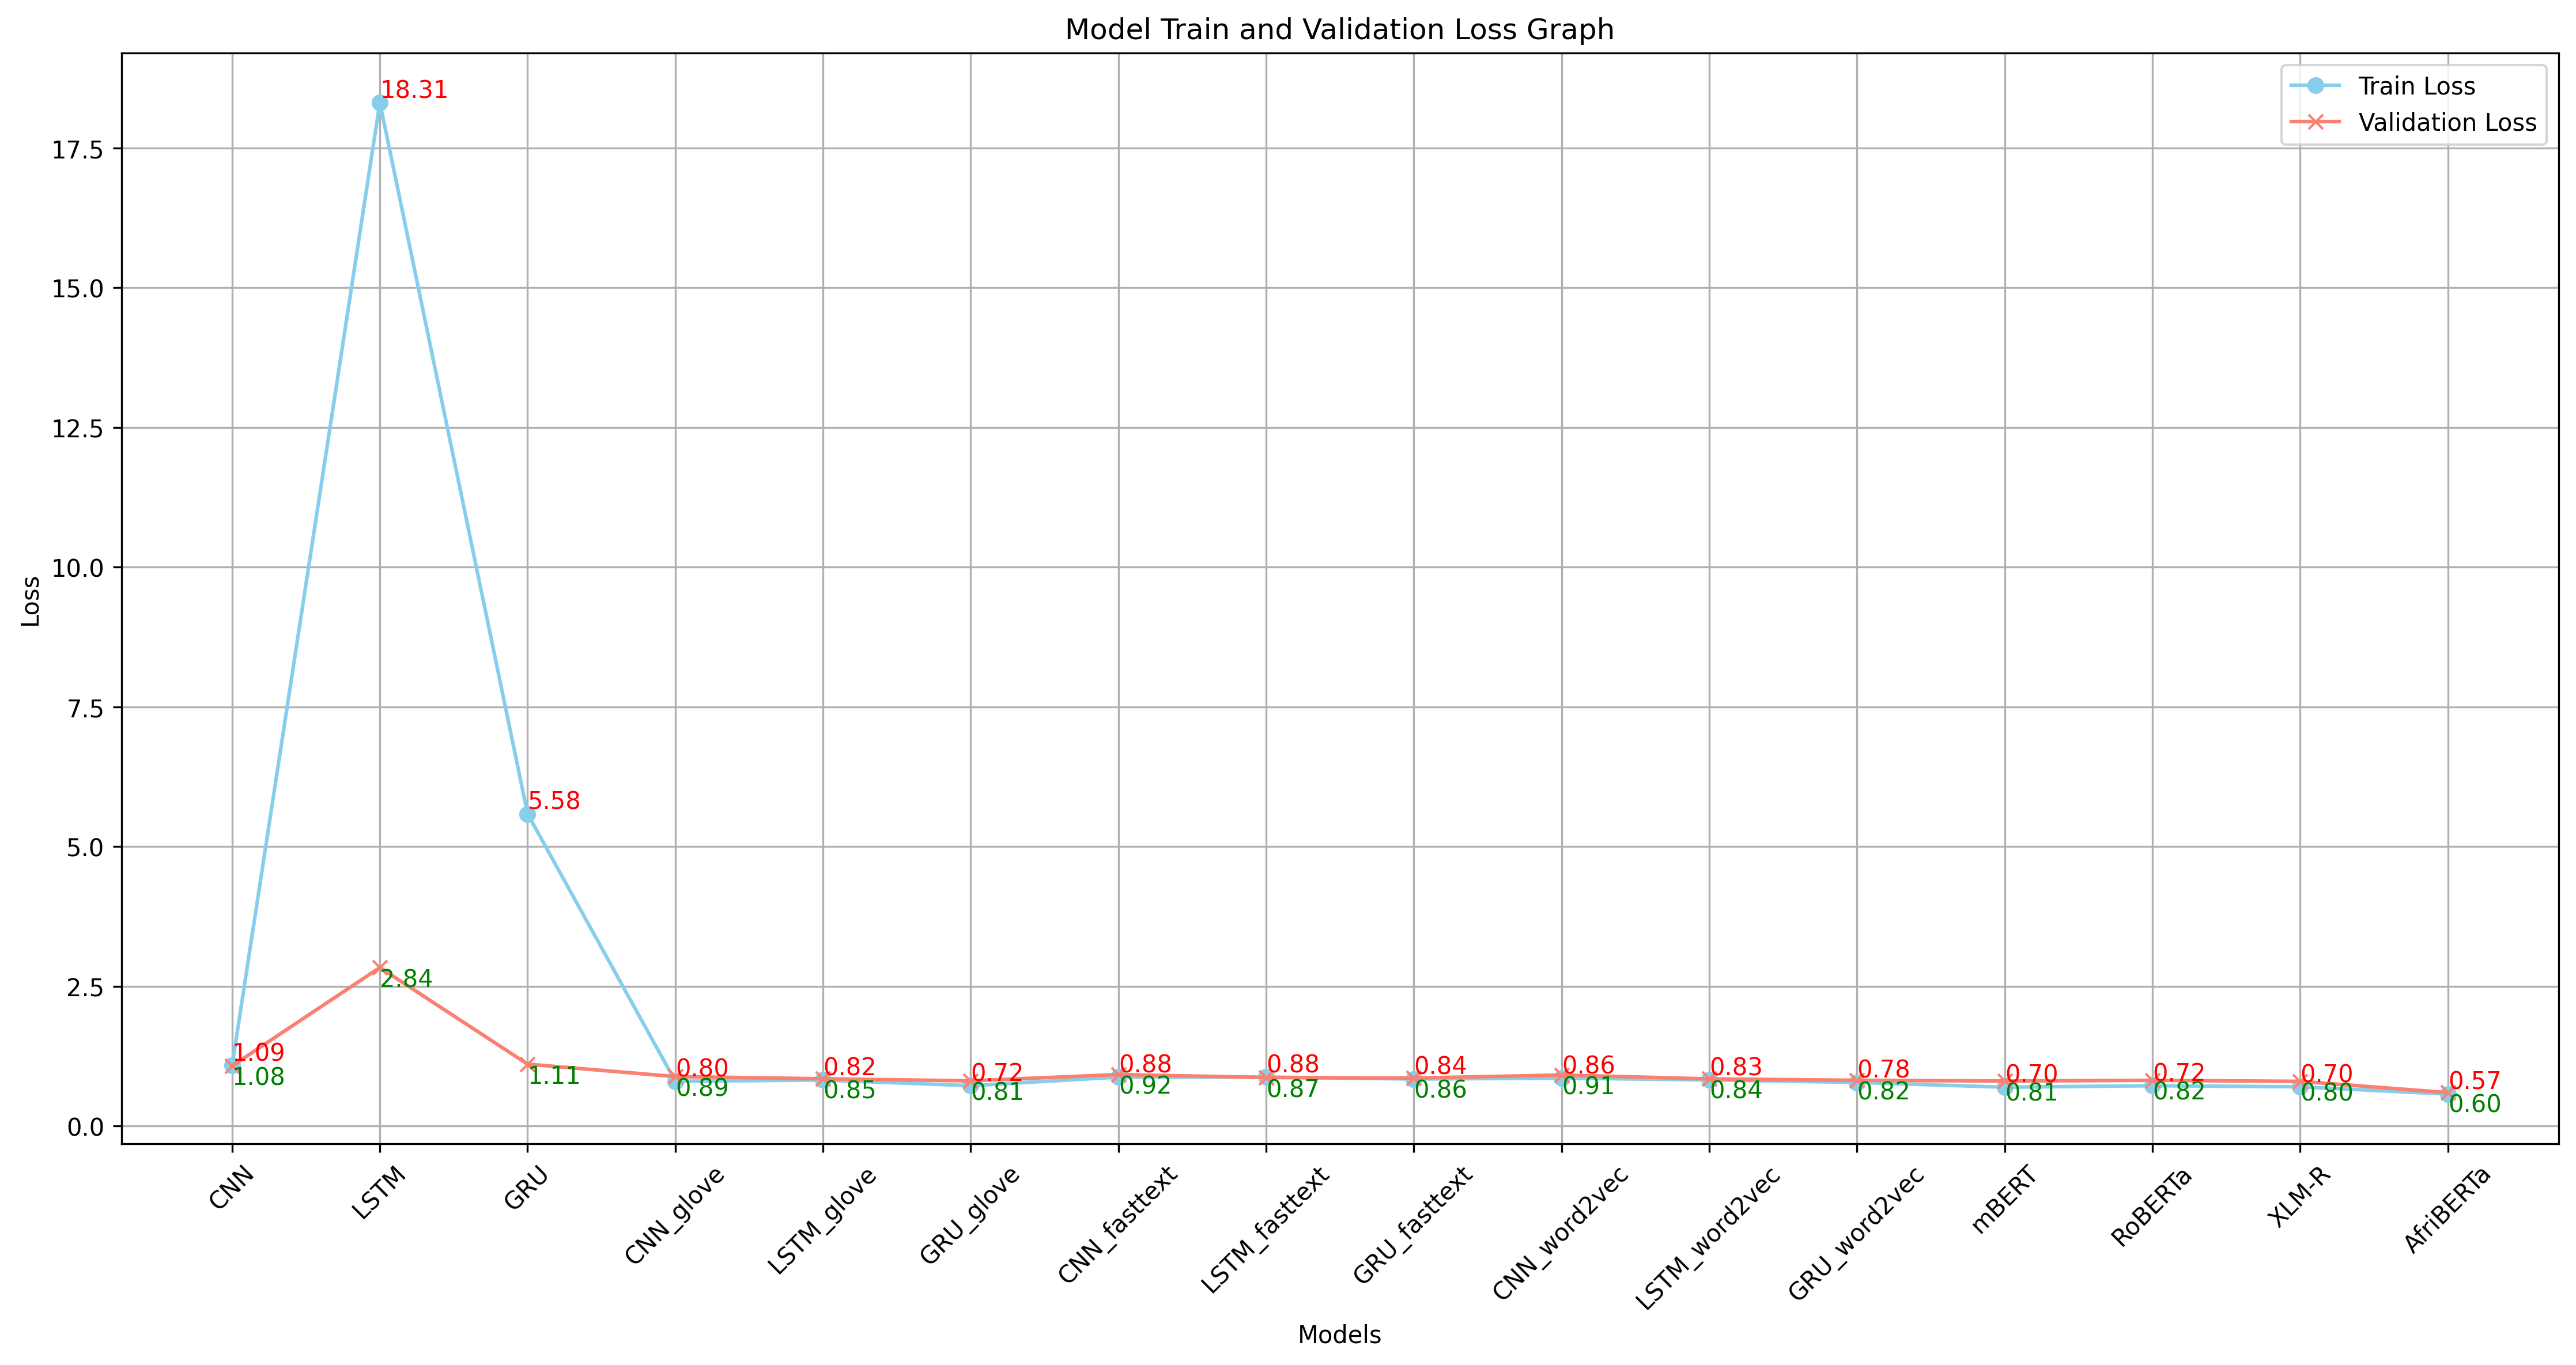

In [3]:
import matplotlib.pyplot as plt

# Define model names and their corresponding train losses and validation losses
model_names = ['CNN', 'LSTM', 'GRU', 'CNN_glove', 'LSTM_glove', 'GRU_glove', 'CNN_fasttext',
               'LSTM_fasttext', 'GRU_fasttext', 'CNN_word2vec', 'LSTM_word2vec', 'GRU_word2vec',
               'mBERT', 'RoBERTa', 'XLM-R', 'AfriBERTa']

Train_loss = [1.0856, 18.3099, 5.5848, 0.8022, 0.8232, 0.7231, 0.8759, 0.8763, 0.8415, 0.8579,
              0.8263, 0.7811, 0.6953, 0.7220, 0.7029, 0.5724]

validation_loss = [1.0766, 2.8362, 1.1078, 0.8857, 0.8461, 0.8095, 0.9219, 0.8690, 0.8582,
                   0.9135, 0.8440, 0.8187, 0.8069, 0.8183, 0.7999, 0.5983]

# Create a line chart for losses
plt.figure(figsize=(15, 8), dpi=300)
plt.plot(model_names, Train_loss, marker='o', linestyle='-', color='skyblue', label='Train Loss')
plt.plot(model_names, validation_loss, marker='x', linestyle='-', color='salmon', label='Validation Loss')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.title('Model Train and Validation Loss Graph')
plt.grid(True)
plt.legend()

# Display accuracy and loss values on data points
for i, (train, val) in enumerate(zip(Train_loss, validation_loss)):
    plt.text(i, train, f'{train:.2f}', ha='left', va='bottom', color='red')
    plt.text(i, val, f'{val:.2f}', ha='left', va='top', color='green')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.savefig("model_loss_graph.png", dpi=300)
plt.show()



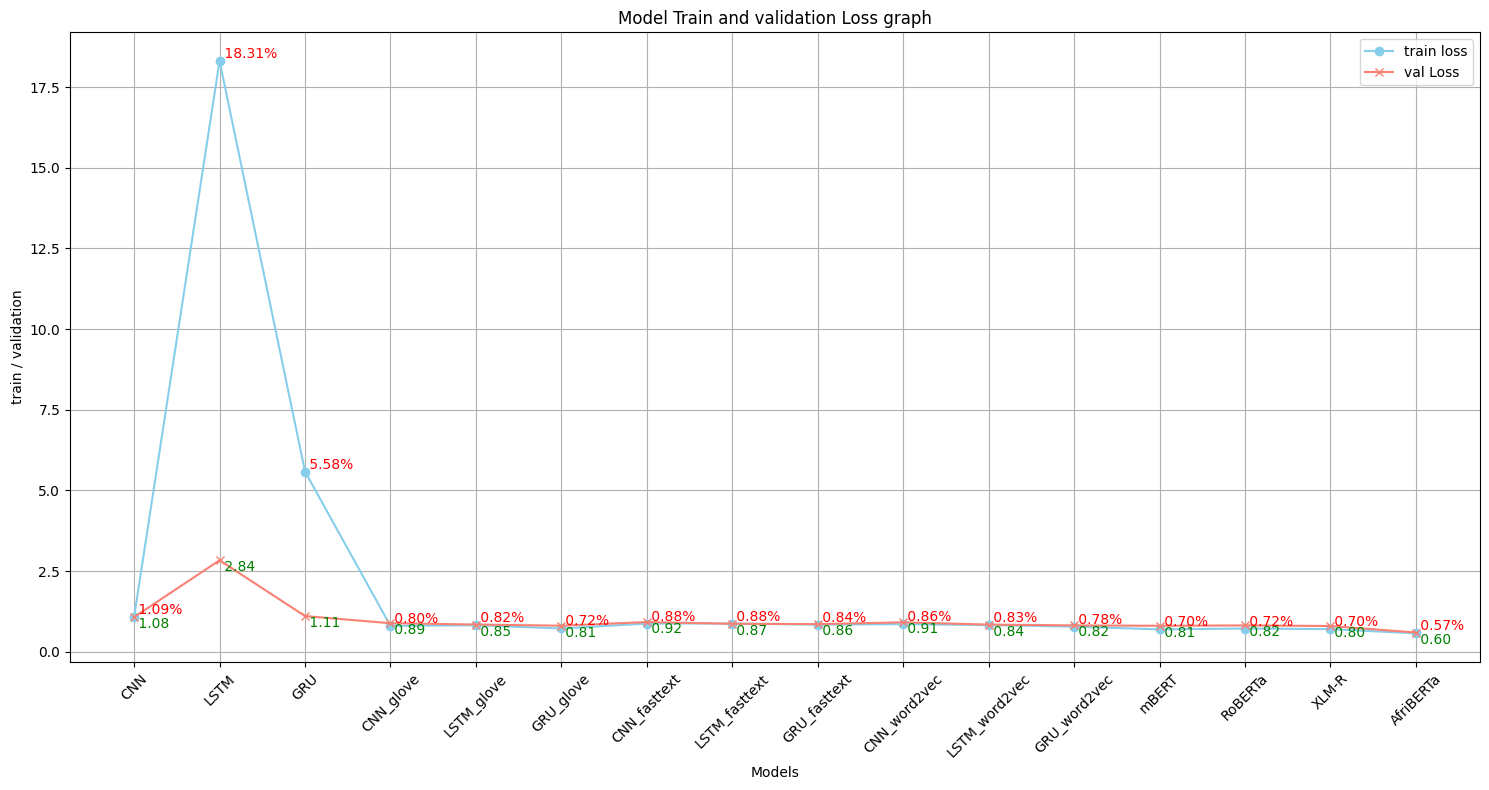

In [ ]:
import matplotlib.pyplot as plt

# Define model names and their corresponding test accuracies and test losses
model_names = ['CNN', 'LSTM', 'GRU', 'CNN_glove', 'LSTM_glove', 'GRU_glove', 'CNN_fasttext','LSTM_fasttext','GRU_fasttext','CNN_word2vec','LSTM_word2vec','GRU_word2vec','mBERT','RoBERTa','XLM-R','AfriBERTa'] #,'mBERT+emb','Afriberta+emb','Ruberta+emb','XLM-R+emb'
Train_loss = [1.0856,18.3099,5.5848,0.8022,0.8232,0.7231,0.8759,0.8763,0.8415,0.8579,0.8263,0.7811,0.6953,0.7220,0.7029,0.5724 ]  # Replace with your actual test accuracy values
validation_loss = [1.0766,2.8362,1.1078,0.8857,0.8461,0.8095,0.9219,0.8690,0.8582,0.9135,0.8440,0.8187,0.8069,0.8183,0.7999,0.5983]  # Replace with your actual loss values

# Create a line chart for accuracies
plt.figure(figsize=(15, 8))
plt.plot(model_names, Train_loss, marker='o', linestyle='-', color='skyblue', label='train loss')
plt.plot(model_names, validation_loss, marker='x', linestyle='-', color='salmon', label='val Loss')
plt.xlabel('Models')
plt.ylabel('train / validation')
plt.title('Model Train and validation Loss graph')
plt.grid(True)
plt.legend()

# Display accuracy and loss values on data points
for i, (train, val) in enumerate(zip(Train_loss, validation_loss)):
    plt.text(model_names[i], train, f' {train:.2f}%', ha='left', va='bottom', color='red')
    plt.text(model_names[i], val, f' {val:.2f}', ha='left', va='top', color='green')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Save the plot with 300dpi resolution
plt.tight_layout()
plt.savefig('model_loss_graph.png', dpi=300)
plt.show()


In [4]:
pip install plotnine


/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 15 x 8 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: model_loss_graph.png


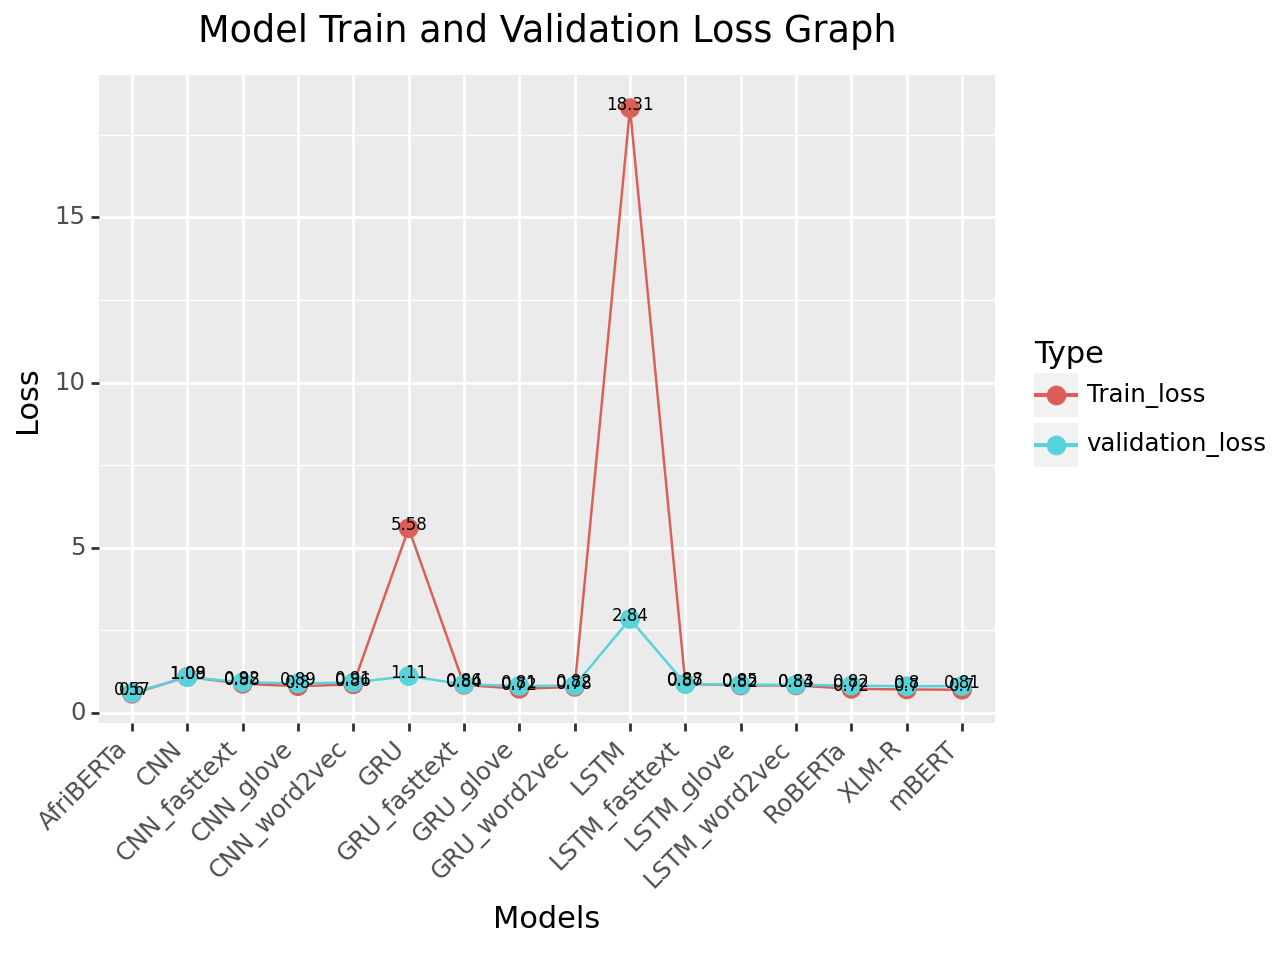

In [24]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, geom_text, labs, theme, element_text

# Define model names and their corresponding train losses and validation losses
model_names = ['CNN', 'LSTM', 'GRU', 'CNN_glove', 'LSTM_glove', 'GRU_glove', 'CNN_fasttext',
               'LSTM_fasttext', 'GRU_fasttext', 'CNN_word2vec', 'LSTM_word2vec', 'GRU_word2vec',
               'mBERT', 'RoBERTa', 'XLM-R', 'AfriBERTa']

Train_loss = [1.0856, 18.3099, 5.5848, 0.8022, 0.8232, 0.7231, 0.8759, 0.8763, 0.8415, 0.8579,
              0.8263, 0.7811, 0.6953, 0.7220, 0.7029, 0.5724]

validation_loss = [1.0766, 2.8362, 1.1078, 0.8857, 0.8461, 0.8095, 0.9219, 0.8690, 0.8582,
                   0.9135, 0.8440, 0.8187, 0.8069, 0.8183, 0.7999, 0.5983]

# Create a data frame
df = pd.DataFrame({
    'model_names': model_names,
    'Train_loss': Train_loss,
    'validation_loss': validation_loss
})

# Convert the data frame to long format
df_long = pd.melt(df, id_vars=['model_names'], value_vars=['Train_loss', 'validation_loss'],
                  var_name='Type', value_name='Loss')

# Create the plot
p = (ggplot(df_long, aes(x='model_names', y='Loss', color='Type', group='Type')) +
     geom_line() +
     geom_point(size=3) +
     geom_text(aes(label='round(Loss, 2)'), nudge_y=0.1, size=6, color='black') +
     labs(title='Model Train and Validation Loss Graph', x='Models', y='Loss') +
     theme(axis_text_x=element_text(angle=45, hjust=1), plot_title=element_text(hjust=0.5)))

# Save the plot with 300 DPI and increased width
p.save('model_loss_graph.png', dpi=300, width=15, height=8, limitsize=False)

print(p)
